In [97]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import cvxpy as cp

# problem 1

## (a)

In [2]:
m = 20 
n = 100
eta = 1e-6
alpha = 0.1
beta = 0.5

In [3]:
def f(x,c):
  return c.T @ x - sum(np.log(x))

In [7]:
def newton_method(x_0, A, b, c):
  lambda_2_history = []
  x = x_0
  for _ in range(100):
    gradient = c - 1/x
    hessian = np.diag((1 / x**2).flatten())

    w = -np.linalg.inv(A@np.linalg.inv(hessian)@A.T)@A@np.linalg.inv(hessian)@gradient
    delta_x = - np.linalg.inv(hessian) @ (gradient+A.T@w)

    lambda_2 = float(-delta_x.T @ gradient)/2
    lambda_2_history.append(lambda_2)

    if lambda_2  <= eta:
      print("-----Newton method converge-----")
      return(lambda_2_history, x)
    
    t = 1 
    while min(x+t*delta_x) <= 0 :
      t = beta*t
    while f(x+t*delta_x,c) >= f(x,c) + alpha*t*gradient.T@delta_x :
      t = beta*t
    
    x = x+t*delta_x
    
  return (lambda_2_history, x)

In [8]:
np.random.seed(0)
A = np.random.normal(0, 1, size=(m, n))
A[-1] = abs(A[-1])
x_0 = np.random.rand(n,1)
b = A @ x_0
c = np.random.normal(0, 1, size=(n,1))
lambda_2_history, x = newton_method(x_0, A, b, c)

-----Newton method converge-----


In [9]:
np.random.seed(1)
A = np.random.normal(0, 1, size=(m, n))
A[-1] = abs(A[-1])
x_0 = np.random.rand(n,1)
b = A @ x_0
c = np.random.normal(0, 1, size=(n,1))
lambda_2_history_2, x_2 = newton_method(x_0, A, b, c)

-----Newton method converge-----


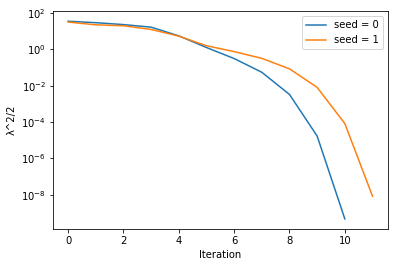

In [10]:
plt.plot(range(11),lambda_2_history,label='seed = 0')
plt.plot(range(12),lambda_2_history_2,label='seed = 1')
plt.xticks(range(0,12,2))
plt.xlabel("Iteration")
plt.ylabel("λ^2/2")
plt.legend()
plt.yscale('log')

## (b)

In [11]:
TOL = 1e-3
t_0 = 1

In [12]:
def barrier_method(x_0, A, b, c, mu):
  t = t_0
  gaps = []
  newton_steps = []
  for _ in range(100):
    gap = m/t
    gaps.append(gap)
    lambda_2_history, x = newton_method(x_0, A, b, t*c)
    newton_steps.append(len(lambda_2_history))
    if gap < TOL:
      print("-----barrier method converge-----")
      return x, gaps, newton_steps
    t = mu * t
  return x, gaps, newton_steps         

In [13]:
np.random.seed(0)
A = np.random.normal(0, 1, size=(m, n))
A[-1] = abs(A[-1])
x_0 = np.random.rand(n,1)
b = A @ x_0
c = np.random.normal(0, 1, size=(n,1))
x_seed0_mu2 = barrier_method(x_0, A, b, c, mu=2)
x_seed0_mu10 = barrier_method(x_0, A, b, c, mu=10)
x_seed0_mu100 = barrier_method(x_0, A, b, c, mu=100)

-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----barrier method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----barrier method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----barrier method converge-----


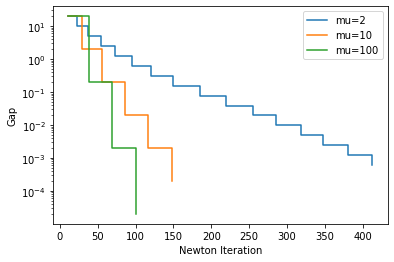

In [19]:
plt.step(np.cumsum(x_seed0_mu2[2]), x_seed0_mu2[1], label='mu=2', where='post')
plt.step(np.cumsum(x_seed0_mu10[2]), x_seed0_mu10[1], label='mu=10', where='post')
plt.step(np.cumsum(x_seed0_mu100[2]), x_seed0_mu100[1], label='mu=100', where='post')
plt.yscale("log")
plt.xlabel("Newton Iteration")
plt.ylabel("Gap")
plt.legend()

In [15]:
np.random.seed(1)
A = np.random.normal(0, 1, size=(m, n))
A[-1] = abs(A[-1])
x_0 = np.random.rand(n,1)
b = A @ x_0
c = np.random.normal(0, 1, size=(n,1))
x_seed1_mu2 = barrier_method(x_0, A, b, c, mu=2)
x_seed1_mu10 = barrier_method(x_0, A, b, c, mu=10)
x_seed1_mu100 = barrier_method(x_0, A, b, c, mu=100)

-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----barrier method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----barrier method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----barrier method converge-----


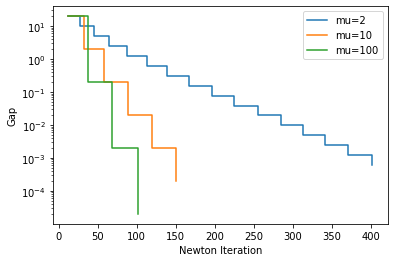

In [16]:
plt.step(np.cumsum(x_seed1_mu2[2]), x_seed1_mu2[1], label='mu=2', where='post')
plt.step(np.cumsum(x_seed1_mu10[2]), x_seed1_mu10[1], label='mu=10', where='post')
plt.step(np.cumsum(x_seed1_mu100[2]), x_seed1_mu100[1], label='mu=100', where='post')
plt.yscale("log")
plt.xlabel("Newton Iteration")
plt.ylabel("Gap")
plt.legend()

In [125]:
# Check your LP solver against the solution found by CVX*
np.random.seed(0)
A = np.random.normal(0, 1, size=(m, n))
A[-1] = abs(A[-1])
x_0 = np.random.rand(n,1)
b = A @ x_0
c = np.random.normal(0, 1, size=(n,1))
x = cp.Variable(shape=(n,1))
obj = c.T@x
constraints = [A@x == b, x>=0]
prob = cp.Problem(cp.Minimize(obj),constraints)
prob.solve()
print("The optimal value is", prob.value)
print("barrier method value is", float(c.T@x_seed0_mu2[0]))
print("barrier method value is", float(c.T@x_seed0_mu10[0]))
print("barrier method value is", float(c.T@x_seed0_mu100[0]))

The optimal value is -131.5327180935766
barrier method value is -131.53027615901507
barrier method value is -131.53199560742792
barrier method value is -131.5326641345042


In [126]:
np.random.seed(1)
A = np.random.normal(0, 1, size=(m, n))
A[-1] = abs(A[-1])
x_0 = np.random.rand(n,1)
b = A @ x_0
c = np.random.normal(0, 1, size=(n,1))
x = cp.Variable(shape=(n,1))
obj = c.T@x
constraints = [A@x == b, x>=0]
prob = cp.Problem(cp.Minimize(obj),constraints)
prob.solve()
print("The optimal value is", prob.value)
print("barrier method value is", float(c.T@x_seed1_mu2[0]))
print("barrier method value is", float(c.T@x_seed1_mu10[0]))
print("barrier method value is", float(c.T@x_seed1_mu100[0]))

The optimal value is -133.23899488535085
barrier method value is -133.23655468977273
barrier method value is -133.23821300481498
barrier method value is -133.2396869503121


## (c)

In [66]:
def general_standard_form(x_0, A, b, c):
  t_0 = 2-min(x_0)
  z_0 = x_0 + (t_0-1)*np.ones((n,1))
  A1 = np.hstack((A, -A@np.ones((n,1))))
  x1 = np.vstack((z_0,t_0))
  b1 = b - A@np.ones((n,1))
  c1 = np.vstack((np.zeros((n,1)), np.ones((1,1))))
  # Phase I
  z_star, gaps_1, newton_steps_1  = barrier_method(x1, A1, b1, c1, mu=10)
  x_star = z_star[:n] - (float(z_star[n])-1)*np.ones((n,1))
  if float(z_star[n]) >= 1:
    print('----problem not feasible----')
    return np.inf
  # Phase II
  x, gaps_2, newton_steps_2  = barrier_method(x_star, A, b, c, mu=10)
  return x

In [67]:
# Check your LP solver against CVX*
# feasible start, seed = 0
np.random.seed(0)
A = np.random.normal(0, 1, size=(m, n))
A[-1] = abs(A[-1])
x_0 = np.random.rand(n,1)
b = A @ x_0
c = np.random.normal(0, 1, size=(n,1))
x = general_standard_form(x_0, A, b, c)
print('LP solver value: ',float(c.T@x))

x = cp.Variable(shape=(n,1))
obj = c.T@x
constraints = [A@x == b, x>=0]
prob = cp.Problem(cp.Minimize(obj),constraints)
prob.solve()
print("The optimal value is", prob.value)

-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----barrier method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----barrier method converge-----
LP solver value:  -131.52875436872358
The optimal value is -131.5327180935766


In [68]:
# feasible start, seed = 1
np.random.seed(1)
A = np.random.normal(0, 1, size=(m, n))
A[-1] = abs(A[-1])
x_0 = np.random.rand(n,1)
b = A @ x_0
c = np.random.normal(0, 1, size=(n,1))
x = general_standard_form(x_0, A, b, c)
print('LP solver value: ',float(c.T@x))

x = cp.Variable(shape=(n,1))
obj = c.T@x
constraints = [A@x == b, x>=0]
prob = cp.Problem(cp.Minimize(obj),constraints)
prob.solve()
print("The optimal value is", prob.value)

-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----barrier method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----barrier method converge-----
LP solver value:  -133.23502347897374
The optimal value is -133.23899488535085


In [72]:
# infeasible start
np.random.seed(0)
A = np.random.normal(0, 1, size=(m, n))
A[-1] = abs(A[-1])
A = abs(A)
x_0 = -abs(np.random.rand(n,1))
b = A @ x_0
b = -abs(b)
c = np.random.normal(0, 1, size=(n,1))

x = general_standard_form(x_0, A, b, c)
print('LP solver value: ',x)

x = cp.Variable(shape=(n,1))
obj = c.T@x
constraints = [A@x == b, x>=0]
prob = cp.Problem(cp.Minimize(obj),constraints)
prob.solve()
print("The optimal value is", prob.value)

-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----Newton method converge-----
-----barrier method converge-----
----problem not feasible----
LP solver value:  inf
The optimal value is inf


# Problem 3

In [57]:
h=1
eta=0.05
Bmax =0.5
Fmax =4
S=0.8
Vt0 =40
L=300

T= 17


Text(0, 0.5, 'b_t')

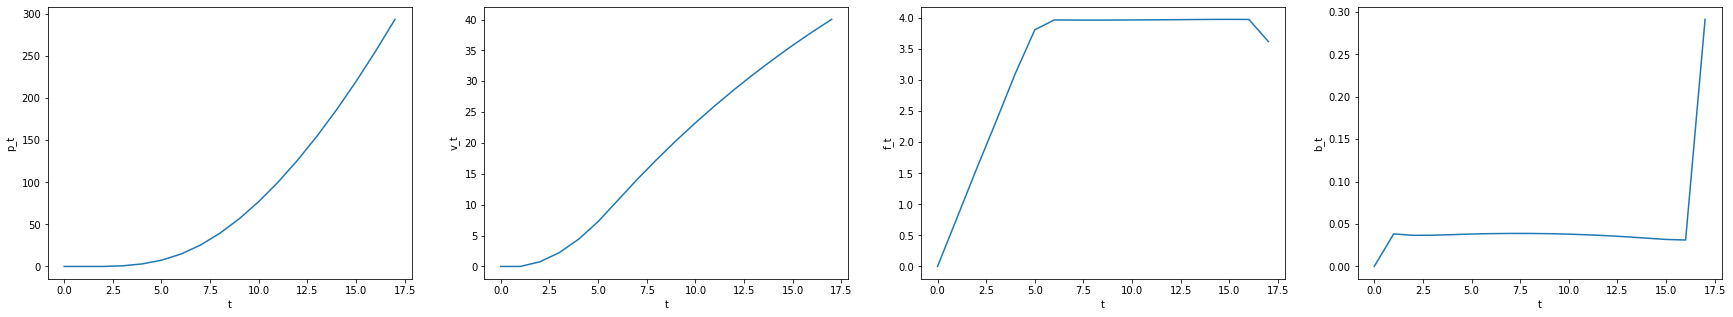

In [58]:
for T in range(1,50):
  v = cp.Variable(T+1)
  f = cp.Variable(T+1)
  b = cp.Variable(T+1)
  p = cp.Variable(T+1)
  constraints = [v[0] == 0,
                 v[1:T+1] == (1-eta)*v[:T] + h*(f[:T]-b[:T]),
                 b >= 0,
                 b <= Bmax,
                 b <= f,
                 f[0] == 0,
                 f >= 0,
                 f <= Fmax,
                 cp.abs(f[1:T+1]-f[:T]) <= S,
                 v[-1] >= Vt0,
                 p[0] == 0,
                 p[1:T+1] == p[:T] + h*(v[:T]),
                 p[-1] <= L
                 ]
  prob = cp.Problem(cp.Minimize(0), constraints=constraints)
  prob.solve()
  if prob.value != np.inf:
    print('T=', T)
    break
fig, ax = plt.subplots(1, 4,figsize=(30, 5))
ax[0].plot(range(T+1),p.value)
ax[0].set_xlabel("t")
ax[0].set_ylabel("p_t")
ax[1].plot(range(T+1),v.value)
ax[1].set_xlabel("t")
ax[1].set_ylabel("v_t")
ax[2].plot(range(T+1),f.value)
ax[2].set_xlabel("t")
ax[2].set_ylabel("f_t")
ax[3].plot(range(T+1),b.value)
ax[3].set_xlabel("t")
ax[3].set_ylabel("b_t")

# Problem 4

## (d)

In [31]:
wc = 0.4*np.pi
alpha = 0.0316
K = 500
w = [i*np.pi/K for i in range(0,K)]

In [83]:
from cvxpy.expressions import constants
for N in range(1,K):
  a = cp.Variable(N+1)
  constraints = []
  for k in range(K):
    wk = k*np.pi/K
    Hw = a[0]+a[1:] @ np.cos([i*wk for i in range(1,N+1)]).T
    if wk < np.pi/3:
      constraints.append(Hw >= 0.89)
      constraints.append(Hw <= 1.12)
    if wk > wc:
      constraints.append(Hw >= -alpha)
      constraints.append(Hw <= alpha)
  prob = cp.Problem(cp.Minimize(N),constraints)
  prob.solve()
  if prob.value != np.inf:
    print('N =', N)
    break

N = 15


Text(0, 0.5, 'H(w)')

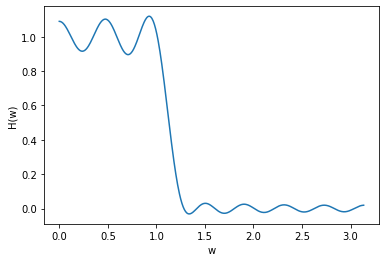

In [94]:
H = []
for k in range(0,K):
    wk = k*np.pi/K
    H.append(a.value[0]+a.value[1:] @ np.cos([i*wk for i in range(1,N+1)]).T)
plt.plot([i*np.pi/K for i in range(0,K)],H)
plt.xlabel("w")
plt.ylabel("H(w)")

# Problem 6

In [98]:
import numpy as np

n = 10
k = 15

Hnom = np.matrix([
  [-0.8651, -1.8523, 0.4197, -0.1122, -2.7506, 0.1803, 1.1892, 0.5313, 0.9505, 0.5645 ],
  [-1.8523, 1.4516, -1.9245, 2.8732, 0.1209, 0.7284, 0.7489, -0.1964, 0.7034, -0.7444 ],
  [0.4197, -1.9245, 1.4286, 2.4392, -1.7482, 1.3657, 2.3490, -1.9712, -0.5001, -0.0643 ],
  [-0.1122, 2.8732, 2.4392, 1.4238, 2.7054, 2.3610, -0.6832, -1.4983, -1.0119, -0.7163 ],
  [-2.7506, 0.1209, -1.7482, 2.7054, -1.6102, 1.1200, 0.6475, -2.3970, -1.9586, 0.3845 ],
  [0.1803, 0.7284, 1.3657, 2.3610, 1.1200, -1.2872, 1.2760, -1.2431, 0.2184, -0.9981 ],
  [1.1892, 0.7489, 2.3490, -0.6832, 0.6475, 1.2760, 1.4619, 0.6963, -0.9674, 1.4583 ],
  [0.5313, -0.1964, -1.9712, -1.4983, -2.3970, -1.2431, 0.6963, 0.6296, 0.7015, 0.218 ],
  [0.9505, 0.7034, -0.5001, -1.0119, -1.9586, 0.2184, -0.9674, 0.7015, 2.1646, -0.9532 ],
  [0.5645, -0.7444, -0.0643, -0.7163, 0.3845, -0.9981, 1.4583, 0.2180, -0.9532, -0.5312 ],
])

Hpert = [None]*k

Hpert[0] = np.matrix([
  [-2.3756, -3.3882, 1.1150, 0.2871, -0.0032, 0.1142, 0.4908, 0.0145, -1.4121, 1.1788 ],
  [-3.3882, -2.1118, 2.1289, 0.2874, -2.0609, -0.1065, -2.0319, -2.9297, 0.1099, 1.6614 ],
  [1.1150, 2.1289, -2.3356, -1.4504, 0.2353, -0.7279, -1.2836, 0.8526, 0.7395, 1.3122 ],
  [0.2871, 0.2874, -1.4504, 2.6792, 1.7780, 0.8834, 0.5105, -1.3658, 0.8202, 0.4316 ],
  [-0.0032, -2.0609, 0.2353, 1.7780, -1.0930, -0.9964, 0.2891, -0.3615, -2.2115, 0.6632 ],
  [0.1142, -0.1065, -0.7279, 0.8834, -0.9964, -0.8695, 0.4736, 0.3008, -1.6291, -1.6872 ],
  [0.4908, -2.0319, -1.2836, 0.5105, 0.2891, 0.4736, -0.4074, -1.7655, 1.1704, 0.4532 ],
  [0.0145, -2.9297, 0.8526, -1.3658, -0.3615, 0.3008, -1.7655, -0.8586, -0.3340, -0.5790 ],
  [-1.4121, 0.1099, 0.7395, 0.8202, -2.2115, -1.6291, 1.1704, -0.3340, -2.7625, 1.5058 ],
  [1.1788, 1.6614, 1.3122, 0.4316, 0.6632, -1.6872, 0.4532, -0.5790, 1.5058, -2.2324 ],
])

Hpert[1] = np.matrix([
  [1.2705, -1.2327, -0.4670, -0.6197, 0.5715, -1.0144, -1.0343, -0.5669, 0.7431, 1.2234 ],
  [-1.2327, -4.6504, -1.4137, 1.7238, -0.1182, 0.5981, -0.3893, -1.8773, -0.8901, -1.2846 ],
  [-0.4670, -1.4137, 3.0420, -0.1168, 0.9512, -0.4345, 1.0802, -2.0395, -0.9306, 1.8851 ],
  [-0.6197, 1.7238, -0.1168, 1.7783, 3.5857, 1.7381, -0.7239, 0.5660, 0.0657, -1.3647 ],
  [0.5715, -0.1182, 0.9512, 3.5857, 3.7268, -0.7972, 0.0921, -1.7490, 0.7518, -3.7741 ],
  [-1.0144, 0.5981, -0.4345, 1.7381, -0.7972, -0.2663, -1.2713, -2.8382, -0.3870, 2.0510 ],
  [-1.0343, -0.3893, 1.0802, -0.7239, 0.0921, -1.2713, -0.4989, -0.6246, 0.2358, -1.3385 ],
  [-0.5669, -1.8773, -2.0395, 0.5660, -1.7490, -2.8382, -0.6246, -0.8033, 1.4517, -1.2352 ],
  [0.7431, -0.8901, -0.9306, 0.0657, 0.7518, -0.3870, 0.2358, 1.4517, -1.0956, 0.8812 ],
  [1.2234, -1.2846, 1.8851, -1.3647, -3.7741, 2.0510, -1.3385, -1.2352, 0.8812, 2.5396 ],
])

Hpert[2] = np.matrix([
  [-1.7921, 0.2420, 0.6979, -0.3519, 0.5290, 0.4255, -0.4450, 1.0192, 0.4265, 1.6553 ],
  [0.2420, 3.6964, -0.9974, 2.8489, 0.4279, -0.6641, -2.3690, 1.3639, 2.1868, 0.3970 ],
  [0.6979, -0.9974, -1.4430, 1.1089, -0.0682, -0.2188, 2.3978, 2.2567, -1.5213, 1.0904 ],
  [-0.3519, 2.8489, 1.1089, 0.6542, -0.2936, -1.2680, -3.3583, -0.7827, -0.1497, -2.2984 ],
  [0.5290, 0.4279, -0.0682, -0.2936, -0.6607, 0.3078, -0.4488, -0.3883, -0.2556, 1.5204 ],
  [0.4255, -0.6641, -0.2188, -1.2680, 0.3078, 0.0824, -1.2624, -0.2881, -2.4964, 1.7696 ],
  [-0.4450, -2.3690, 2.3978, -3.3583, -0.4488, -1.2624, 3.2395, 0.3884, 0.7814, -1.7613 ],
  [1.0192, 1.3639, 2.2567, -0.7827, -0.3883, -0.2881, 0.3884, -1.1447, 0.1292, -1.4494 ],
  [0.4265, 2.1868, -1.5213, -0.1497, -0.2556, -2.4964, 0.7814, 0.1292, -2.4551, -0.8555 ],
  [1.6553, 0.3970, 1.0904, -2.2984, 1.5204, 1.7696, -1.7613, -1.4494, -0.8555, -2.1081 ],
])

Hpert[3] = np.matrix([
  [-0.1431, 1.1356, 2.7541, -1.1946, -1.3246, 1.5172, -0.0653, -0.4307, -1.7523, 1.0293 ],
  [1.1356, 0.5370, 1.9448, -1.8866, 0.7684, 0.6029, -1.7781, 0.7189, 1.0505, 0.7786 ],
  [2.7541, 1.9448, -1.8189, -2.5142, 1.6815, -0.1104, -0.2158, -0.7895, -1.4768, -1.6414 ],
  [-1.1946, -1.8866, -2.5142, 1.5118, -0.6013, -2.0505, 1.4064, -0.4957, 1.4458, -1.6632 ],
  [-1.3246, 0.7684, 1.6815, -0.6013, -1.9280, -1.8710, -1.1968, 0.3127, -0.3868, -0.8197 ],
  [1.5172, 0.6029, -0.1104, -2.0505, -1.8710, -0.8418, -1.8485, 0.2943, -1.6591, 0.8479 ],
  [-0.0653, -1.7781, -0.2158, 1.4064, -1.1968, -1.8485, -0.2871, -1.1267, -0.4745, -0.5978 ],
  [-0.4307, 0.7189, -0.7895, -0.4957, 0.3127, 0.2943, -1.1267, 1.1697, -1.8231, 0.6652 ],
  [-1.7523, 1.0505, -1.4768, 1.4458, -0.3868, -1.6591, -0.4745, -1.8231, 0.7332, -1.3198 ],
  [1.0293, 0.7786, -1.6414, -1.6632, -0.8197, 0.8479, -0.5978, 0.6652, -1.3198, -0.1291 ],
])

Hpert[4] = np.matrix([
  [-2.8880, 0.7042, -1.2407, -0.9757, -0.7164, 0.9147, -0.1483, 0.8619, 1.5960, -0.6320 ],
  [0.7042, -1.6152, 0.3049, -1.1793, -1.8731, -1.8635, -0.6633, 0.4877, -1.0456, 0.0199 ],
  [-1.2407, 0.3049, 4.4737, 1.3236, 0.8130, -0.6212, -0.1396, 0.6741, 2.0102, 2.7344 ],
  [-0.9757, -1.1793, 1.3236, 2.4318, 0.0103, 0.3072, -1.5635, -1.4942, 1.0417, 1.2218 ],
  [-0.7164, -1.8731, 0.8130, 0.0103, 0.1670, 0.0890, -0.0011, 1.3752, -1.3021, -2.6859 ],
  [0.9147, -1.8635, -0.6212, 0.3072, 0.0890, 1.1171, 0.3212, -1.0539, -1.4476, -0.7397 ],
  [-0.1483, -0.6633, -0.1396, -1.5635, -0.0011, 0.3212, 0.2944, -0.4523, -3.3884, -1.4077 ],
  [0.8619, 0.4877, 0.6741, -1.4942, 1.3752, -1.0539, -0.4523, 1.7842, 2.5041, -0.9596 ],
  [1.5960, -1.0456, 2.0102, 1.0417, -1.3021, -1.4476, -3.3884, 2.5041, -0.4970, -1.8429 ],
  [-0.6320, 0.0199, 2.7344, 1.2218, -2.6859, -0.7397, -1.4077, -0.9596, -1.8429, 1.4384 ],
])

Hpert[5] = np.matrix([
  [2.2835, 0.5990, 3.4777, -0.9529, -0.0681, 0.8251, -0.3512, -0.1139, 0.6734, 0.1537 ],
  [0.5990, 1.5563, 0.0738, 0.6000, 1.6135, 0.8073, -0.7476, 1.7298, -1.1902, -0.1440 ],
  [3.4777, 0.0738, -1.8746, 0.1091, 2.0512, 0.2585, 2.3314, 0.1235, 0.7790, 1.0096 ],
  [-0.9529, 0.6000, 0.1091, -1.3710, -0.0892, -1.5108, -1.4525, 0.9204, -1.1727, -3.1071 ],
  [-0.0681, 1.6135, 2.0512, -0.0892, -0.0746, -1.9857, -0.6944, 0.5712, -0.2255, -0.1535 ],
  [0.8251, 0.8073, 0.2585, -1.5108, -1.9857, -1.9067, -0.5301, 1.0040, -1.7480, 0.7281 ],
  [-0.3512, -0.7476, 2.3314, -1.4525, -0.6944, -0.5301, 4.3529, 0.3179, 0.6217, 1.1808 ],
  [-0.1139, 1.7298, 0.1235, 0.9204, 0.5712, 1.0040, 0.3179, 0.2559, -1.4798, -0.8466 ],
  [0.6734, -1.1902, 0.7790, -1.1727, -0.2255, -1.7480, 0.6217, -1.4798, -3.4515, 1.6194 ],
  [0.1537, -0.1440, 1.0096, -3.1071, -0.1535, 0.7281, 1.1808, -0.8466, 1.6194, 0.4343 ],
])

Hpert[6] = np.matrix([
  [-0.7469, 0.0912, 0.8199, -2.7284, -1.5999, 2.0026, -0.5828, 2.6208, -0.8500, -0.9571 ],
  [0.0912, -0.3571, 0.5111, 1.4264, -0.6965, 1.1619, -0.2757, 1.6020, 1.5347, -1.1224 ],
  [0.8199, 0.5111, -2.1040, -1.3614, 0.8454, -2.1223, -0.8729, 0.6144, -1.0635, -2.5367 ],
  [-2.7284, 1.4264, -1.3614, 2.5262, -0.4181, -1.2518, 0.1317, 2.7936, 1.1168, -0.7344 ],
  [-1.5999, -0.6965, 0.8454, -0.4181, 1.5106, 0.6176, 0.5513, 1.5116, -2.3239, -0.6955 ],
  [2.0026, 1.1619, -2.1223, -1.2518, 0.6176, 5.4633, 1.6022, -0.3483, 0.8633, -0.9902 ],
  [-0.5828, -0.2757, -0.8729, 0.1317, 0.5513, 1.6022, 1.5424, -4.2988, -1.3485, 1.1396 ],
  [2.6208, 1.6020, 0.6144, 2.7936, 1.5116, -0.3483, -4.2988, -1.9808, -0.7574, -3.0000 ],
  [-0.8500, 1.5347, -1.0635, 1.1168, -2.3239, 0.8633, -1.3485, -0.7574, 0.5876, 0.3886 ],
  [-0.9571, -1.1224, -2.5367, -0.7344, -0.6955, -0.9902, 1.1396, -3.0000, 0.3886, 0.6869 ],
])

Hpert[7] = np.matrix([
  [1.5164, -1.0288, -0.6916, 0.3759, 1.6597, -3.0491, 0.4837, 0.1155, -1.1908, 0.9576 ],
  [-1.0288, 1.9415, -0.7931, -0.0116, -2.1883, -0.0430, 0.6561, 2.0801, 0.0055, -1.6433 ],
  [-0.6916, -0.7931, 0.6634, -0.7923, 1.8284, 0.3040, 2.3257, 1.4869, 1.1270, 1.3369 ],
  [0.3759, -0.0116, -0.7923, 1.1778, -1.8739, 0.8303, -1.4213, -0.9153, 1.1512, 0.4781 ],
  [1.6597, -2.1883, 1.8284, -1.8739, 2.2191, -2.0111, 0.7245, 2.2823, 1.7011, 0.6088 ],
  [-3.0491, -0.0430, 0.3040, 0.8303, -2.0111, 1.1767, 0.8441, -0.1872, 0.3460, 0.1573 ],
  [0.4837, 0.6561, 2.3257, -1.4213, 0.7245, 0.8441, 1.3245, -2.0105, 0.7422, 1.3061 ],
  [0.1155, 2.0801, 1.4869, -0.9153, 2.2823, -0.1872, -2.0105, -0.2994, -0.5946, -1.9085 ],
  [-1.1908, 0.0055, 1.1270, 1.1512, 1.7011, 0.3460, 0.7422, -0.5946, 0.5783, -0.3022 ],
  [0.9576, -1.6433, 1.3369, 0.4781, 0.6088, 0.1573, 1.3061, -1.9085, -0.3022, 2.7907 ],
])

Hpert[8] = np.matrix([
  [0.8817, 0.7863, -2.3402, 1.2758, -3.0907, 2.0810, -1.0098, -1.9281, -0.7349, 1.3017 ],
  [0.7863, -2.0121, -0.0244, -0.1908, -0.1163, 1.7948, 0.1342, 0.2946, -0.7330, -0.2950 ],
  [-2.3402, -0.0244, -1.4745, -0.1365, -1.2744, 1.8877, 1.1876, 1.6389, -0.9335, -0.4737 ],
  [1.2758, -0.1908, -0.1365, -2.1552, -0.1308, 2.6412, -0.4795, 0.1106, -0.2928, -0.9607 ],
  [-3.0907, -0.1163, -1.2744, -0.1308, -1.3662, 0.0490, -0.1207, -3.3537, -2.0114, -0.2681 ],
  [2.0810, 1.7948, 1.8877, 2.6412, 0.0490, 0.1392, -1.2287, -0.7792, -0.4053, -0.1721 ],
  [-1.0098, 0.1342, 1.1876, -0.4795, -0.1207, -1.2287, 3.0700, -0.4987, 0.1676, -0.7327 ],
  [-1.9281, 0.2946, 1.6389, 0.1106, -3.3537, -0.7792, -0.4987, -3.1128, -0.4981, -2.1836 ],
  [-0.7349, -0.7330, -0.9335, -0.2928, -2.0114, -0.4053, 0.1676, -0.4981, -0.6024, 0.0982 ],
  [1.3017, -0.2950, -0.4737, -0.9607, -0.2681, -0.1721, -0.7327, -2.1836, 0.0982, 0.6548 ],
])

Hpert[9] = np.matrix([
  [1.4319, 1.2969, -2.2161, -2.2473, 1.4910, 1.1407, 0.1057, -0.2886, -1.4843, -0.9251 ],
  [1.2969, 1.9139, -0.2176, -0.3275, -0.2272, 2.2352, -2.2959, 3.1775, -0.7976, -1.4588 ],
  [-2.2161, -0.2176, 2.6874, -3.1484, 1.0178, 1.8879, -3.0266, 0.3680, -0.6852, -1.1662 ],
  [-2.2473, -0.3275, -3.1484, -3.2626, -0.3822, -0.7716, -0.6207, 0.1180, -0.6043, -1.3290 ],
  [1.4910, -0.2272, 1.0178, -0.3822, -1.8160, 1.1944, -0.6355, 2.4854, 1.8676, 0.7282 ],
  [1.1407, 2.2352, 1.8879, -0.7716, 1.1944, -0.3192, 0.2048, -1.5255, 1.7923, 0.8973 ],
  [0.1057, -2.2959, -3.0266, -0.6207, -0.6355, 0.2048, 3.1646, 1.9705, 2.3559, -0.2590 ],
  [-0.2886, 3.1775, 0.3680, 0.1180, 2.4854, -1.5255, 1.9705, 2.7122, 0.5588, -0.9730 ],
  [-1.4843, -0.7976, -0.6852, -0.6043, 1.8676, 1.7923, 2.3559, 0.5588, -4.3551, 0.0627 ],
  [-0.9251, -1.4588, -1.1662, -1.3290, 0.7282, 0.8973, -0.2590, -0.9730, 0.0627, 0.4352 ],
])

Hpert[10] = np.matrix([
  [3.3686, -0.2267, 0.3990, 2.5193, -0.0834, 0.4644, 0.8532, -0.6513, -3.3348, -3.7140 ],
  [-0.2267, -1.2219, -1.7066, -2.5655, 0.0363, -1.3587, -0.2413, 2.2271, -1.3337, -0.0091 ],
  [0.3990, -1.7066, 2.4665, 2.3814, 0.1569, -1.7990, -0.0206, -2.1901, 0.5169, 4.0659 ],
  [2.5193, -2.5655, 2.3814, -0.5668, 1.7352, -0.5087, 1.6270, 0.5661, -1.4503, -0.9417 ],
  [-0.0834, 0.0363, 0.1569, 1.7352, -1.5931, -3.1355, -1.3405, -0.7754, -2.5817, 1.5303 ],
  [0.4644, -1.3587, -1.7990, -0.5087, -3.1355, -2.7151, -2.5397, 1.1861, -0.3338, 2.4069 ],
  [0.8532, -0.2413, -0.0206, 1.6270, -1.3405, -2.5397, -1.3272, 2.1564, -1.3315, -1.0731 ],
  [-0.6513, 2.2271, -2.1901, 0.5661, -0.7754, 1.1861, 2.1564, -0.1457, 0.0147, 0.7800 ],
  [-3.3348, -1.3337, 0.5169, -1.4503, -2.5817, -0.3338, -1.3315, 0.0147, -1.2993, 0.7516 ],
  [-3.7140, -0.0091, 4.0659, -0.9417, 1.5303, 2.4069, -1.0731, 0.7800, 0.7516, 0.0331 ],
])

Hpert[11] = np.matrix([
  [-0.1456, -1.8617, -1.0432, -1.0750, 1.1634, 0.4894, 0.8040, -2.2214, -0.7694, -0.4022 ],
  [-1.8617, -0.9485, 0.0544, 2.5685, 0.3394, 0.0892, -0.3911, -3.1052, -0.3992, 2.8154 ],
  [-1.0432, 0.0544, 0.3591, 0.9051, 0.4368, 4.7687, 0.5422, -1.4317, -0.2065, -0.0473 ],
  [-1.0750, 2.5685, 0.9051, -0.3875, 0.3219, -1.0467, -0.8930, -0.9560, -1.2953, -0.0049 ],
  [1.1634, 0.3394, 0.4368, 0.3219, 0.8538, 1.8843, 1.0402, 0.1995, -0.9157, 1.7703 ],
  [0.4894, 0.0892, 4.7687, -1.0467, 1.8843, -3.9336, -0.1170, -1.8965, -0.9522, -0.8874 ],
  [0.8040, -0.3911, 0.5422, -0.8930, 1.0402, -0.1170, -1.1216, 0.1993, -2.5093, 0.3517 ],
  [-2.2214, -3.1052, -1.4317, -0.9560, 0.1995, -1.8965, 0.1993, -1.1169, 1.4366, -0.4060 ],
  [-0.7694, -0.3992, -0.2065, -1.2953, -0.9157, -0.9522, -2.5093, 1.4366, -3.0959, 0.0350 ],
  [-0.4022, 2.8154, -0.0473, -0.0049, 1.7703, -0.8874, 0.3517, -0.4060, 0.0350, -1.3153 ],
])

Hpert[12] = np.matrix([
  [-1.5185, -1.3608, 1.5537, 0.7003, -2.1594, 2.4307, 0.1517, -1.5616, -0.3301, 1.8532 ],
  [-1.3608, -0.2127, 1.1507, 0.4849, -3.4171, -1.0890, -0.4338, 0.4424, 3.7614, 1.4820 ],
  [1.5537, 1.1507, -0.2856, 0.1298, 0.7675, -0.6154, 1.9924, 0.3818, -0.5881, 1.2259 ],
  [0.7003, 0.4849, 0.1298, 0.7106, 0.7546, 1.5283, 0.3976, -0.9764, -2.1904, 0.9571 ],
  [-2.1594, -3.4171, 0.7675, 0.7546, 1.2928, -2.4822, 0.8102, 1.3795, 1.6737, 1.3945 ],
  [2.4307, -1.0890, -0.6154, 1.5283, -2.4822, 0.9140, 2.1517, 2.6613, -0.8490, 1.4860 ],
  [0.1517, -0.4338, 1.9924, 0.3976, 0.8102, 2.1517, 0.1775, 3.4246, -1.7911, 1.1764 ],
  [-1.5616, 0.4424, 0.3818, -0.9764, 1.3795, 2.6613, 3.4246, -3.3497, -3.5146, 0.8021 ],
  [-0.3301, 3.7614, -0.5881, -2.1904, 1.6737, -0.8490, -1.7911, -3.5146, 2.3497, 1.1687 ],
  [1.8532, 1.4820, 1.2259, 0.9571, 1.3945, 1.4860, 1.1764, 0.8021, 1.1687, -1.5614 ],
])

Hpert[13] = np.matrix([
  [1.0620, 3.5062, 1.1616, 0.8691, 0.4853, 0.0522, -1.0879, -0.5845, 1.0701, -0.3467 ],
  [3.5062, 0.4912, -0.9086, -0.0199, -0.0785, -0.5907, -0.9312, 0.0560, 3.0544, 0.0370 ],
  [1.1616, -0.9086, 2.5890, -0.3884, 0.8463, 1.6362, -1.1092, 0.8460, -0.7591, -1.3382 ],
  [0.8691, -0.0199, -0.3884, 0.1682, -0.2810, -2.1212, 2.4718, -0.7551, 0.2173, 1.8061 ],
  [0.4853, -0.0785, 0.8463, -0.2810, 5.1615, 0.3964, -0.4144, 0.9269, -0.4351, 0.0425 ],
  [0.0522, -0.5907, 1.6362, -2.1212, 0.3964, -0.9380, -1.4396, 1.8829, 0.8466, -0.5979 ],
  [-1.0879, -0.9312, -1.1092, 2.4718, -0.4144, -1.4396, -0.1494, -0.6958, 0.4715, -1.0116 ],
  [-0.5845, 0.0560, 0.8460, -0.7551, 0.9269, 1.8829, -0.6958, 3.1006, 2.0333, -0.8926 ],
  [1.0701, 3.0544, -0.7591, 0.2173, -0.4351, 0.8466, 0.4715, 2.0333, 3.4442, -0.0583 ],
  [-0.3467, 0.0370, -1.3382, 1.8061, 0.0425, -0.5979, -1.0116, -0.8926, -0.0583, -1.0135 ],
])

Hpert[14] = np.matrix([
  [-4.2075, -1.1611, 2.0052, -0.7372, 3.2426, -1.2741, 0.3981, 1.3734, 2.8618, 0.1256 ],
  [-1.1611, 2.4705, -1.9167, 2.1766, 1.9147, 0.2245, 2.3064, -0.2141, -0.9027, 1.2694 ],
  [2.0052, -1.9167, -1.5209, -3.7971, -1.2494, 0.6345, 0.0506, -0.6883, -3.0050, 0.6130 ],
  [-0.7372, 2.1766, -3.7971, 1.8079, 0.2806, -2.2570, 1.7228, 2.1483, 1.0915, -0.8857 ],
  [3.2426, 1.9147, -1.2494, 0.2806, 3.0341, 2.2205, -0.2904, -0.7545, -0.0186, 1.2435 ],
  [-1.2741, 0.2245, 0.6345, -2.2570, 2.2205, -0.1210, -0.6548, 0.9812, 2.4263, 1.9293 ],
  [0.3981, 2.3064, 0.0506, 1.7228, -0.2904, -0.6548, 2.4857, -1.6529, -0.1262, 0.4293 ],
  [1.3734, -0.2141, -0.6883, 2.1483, -0.7545, 0.9812, -1.6529, -1.3936, 1.1239, -0.1861 ],
  [2.8618, -0.9027, -3.0050, 1.0915, -0.0186, 2.4263, -0.1262, 1.1239, 0.6339, 2.2922 ],
  [0.1256, 1.2694, 0.6130, -0.8857, 1.2435, 1.9293, 0.4293, -0.1861, 2.2922, -1.2433 ],
])


In [134]:
from scipy.linalg import null_space
x = cp.Variable(k)
lbd = cp.Variable()
H = Hnom
for i in range(k):
  H += x[i]*Hpert[i]
eigenValues,eigenVectors =  np.linalg.eig(Hnom)
idx = eigenValues.argsort()[::1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
vnom1 = eigenVectors[:,0]
Q= null_space(vnom1.T)
obj = cp.Maximize(cp.lambda_min(Q.T@H@Q)-lbd)
constraints = [lbd*vnom1 == H@vnom1,
               x <= 1,
               x >= -1]
prob = cp.Problem(obj,constraints)
prob.solve(solver = cp.CVXOPT)

7.141220802796975

In [138]:
print('optimal perturbations:', x.value)
print('energy gap for the nominal systems:', eigenValues[1]-eigenValues[0])
per_eigenValues,per_eigenVectors =  np.linalg.eig(H.value)
idx = per_eigenValues.argsort()[::1]   
per_eigenValues = per_eigenValues[idx]
per_eigenVectors = per_eigenVectors[:,idx]
print('energy gap for the perturbed systems:', per_eigenValues[1]-per_eigenValues[0])

optimal perturbations: [ 0.35456533  0.1552044   0.84640516 -0.51879782  0.14729591 -0.73154978
  0.3514761  -0.99999992 -0.4400198  -0.2200036  -0.37301697  0.69514615
 -0.51682176 -1.         -1.        ]
energy gap for the nominal systems: 3.562754457320604
energy gap for the perturbed systems: 7.141220805489407
